# *__Amazon climate data__*

Here I describe the exploration of a dataset containing climate data of Manacapuru city, Amazonas, Brazil. The ideia here is to show all questions and hypothesis that were created during this exploration process.

__*Loading dependencies*__

In [ ]:
library(data.table)
library(ggplot2)
library(GGally)
library(ggmap)
library(ggthemes)
library(scales)
library(RColorBrewer)
library(animation)
library(plotly)

__*Reading climate data from GOAmazon project*__

In [2]:
amazon <- fread('data/go-amazon-arm.tsv')

In [3]:
head(amazon, 3)

day,hour,wspeed_mean,wdir_mean,airtemp_mean,rh_mean,baro_mean,rain_mean,wspeed_min,wdir_min,⋯,rain_max,CO_mean,N2O_mean,H2O_mean,CO_min,N2O_min,H2O_min,CO_max,N2O_max,H2O_max
2014-01-01,0,1.1547778,136.6442,26.45550,78.01989,1002.257,0,0.1,57,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
2014-01-01,1,0.7744782,157.3089,26.21998,79.02552,1003.203,0,0.0,0,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
2014-01-01,10,1.0734444,158.0589,23.94258,87.26411,1002.854,0,0.3,0,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
head(amazon)

day,hour,wspeed_mean,wdir_mean,airtemp_mean,rh_mean,baro_mean,rain_mean,wspeed_min,wdir_min,⋯,rain_max,CO_mean,N2O_mean,H2O_mean,CO_min,N2O_min,H2O_min,CO_max,N2O_max,H2O_max
2014-01-01,0,1.1547778,136.64417,26.45550,78.01989,1002.257,0,0.1,57,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
2014-01-01,1,0.7744782,157.30893,26.21998,79.02552,1003.203,0,0.0,0,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
2014-01-01,10,1.0734444,158.05889,23.94258,87.26411,1002.854,0,0.3,0,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
2014-01-01,11,1.3765542,93.91107,25.81583,81.33708,1003.591,0,0.1,0,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
2014-01-01,12,2.9063889,86.08639,27.97169,71.92181,1003.945,0,1.2,37,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
2014-01-01,13,3.0173056,78.30833,29.55483,62.37578,1003.771,0,0.9,16,⋯,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


__*Preprocessing and Cleaning*__

In [5]:
setnames(amazon, tolower(colnames(amazon)))

In [6]:
amazon[, day := as.Date(day)]
amazon[, month_day := as.Date(format.Date(day, "%b-%d"), "%b-%d")]
amazon[, month := as.numeric(format.Date(day, "%m"))]
amazon[, year := as.numeric(format.Date(day, "%Y"))]
amazon[, monthname := factor(month.abb[as.numeric(month)], levels=month.abb)]

Helper function that substitutes values in data.table (by reference) if given conditions match

In [7]:
value2value <- function(dtable, condition, substitute){
    #condition example: '>0', '==1', '<=0', '=="tobias"'
    for(j in seq_along(dtable)){
        vectype <- class(dtable[[j]])
        if (vectype=='integer' || vectype=='numeric' || vectype=='character'){
            set(dtable, i=which(eval(parse(text=paste0('dtable[[j]]', condition)))),
                j=j, value=substitute)
        }
    }
}

In [8]:
value2value(amazon, "==-1", NA)

### __*Visualizing the data*__

We need to melt the dataset in order to better visualize it with ggplot2

In [ ]:
long_amazon = melt(amazon, id=c('day','hour','month','year','monthname','month_day'))

In [10]:
head(long_amazon)

day,hour,month,year,monthname,month_day,variable,value
2014-01-01,0,1,2014,Jan,2018-01-01,wspeed_mean,1.1547778
2014-01-01,1,1,2014,Jan,2018-01-01,wspeed_mean,0.7744782
2014-01-01,10,1,2014,Jan,2018-01-01,wspeed_mean,1.0734444
2014-01-01,11,1,2014,Jan,2018-01-01,wspeed_mean,1.3765542
2014-01-01,12,1,2014,Jan,2018-01-01,wspeed_mean,2.9063889
2014-01-01,13,1,2014,Jan,2018-01-01,wspeed_mean,3.0173056


In [11]:
long_amazon[, c("measured_var", "stats") := tstrsplit(variable, "_", fixed=T)]
long_amazon[is.infinite(value), value := NA]

*__What is the distribution of values for each variable?__*

Warning message:
“Removed 3542 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3542 rows containing non-finite values (stat_boxplot).”

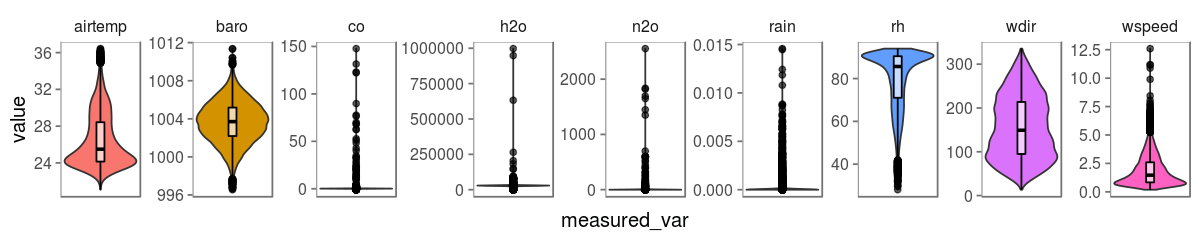

In [12]:
options(repr.plot.width=10, repr.plot.height=2)
g <- ggplot(long_amazon[stats=="mean"], aes(x=measured_var, y=value, fill=measured_var)) +
         geom_violin() + 
         geom_boxplot(width=0.1, alpha=0.65, fill="white", colour="black", 
                      outlier.color='black') +
         facet_wrap(~measured_var, scales="free",nrow=1) + 
         theme_few() + guides(fill=FALSE) +
         theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())
g

*__How do our variables behave during the year? Let's check it out!__*

Warning message:
“Removed 3542 rows containing non-finite values (stat_summary).”Warning message:
“Removed 3542 rows containing non-finite values (stat_summary).”

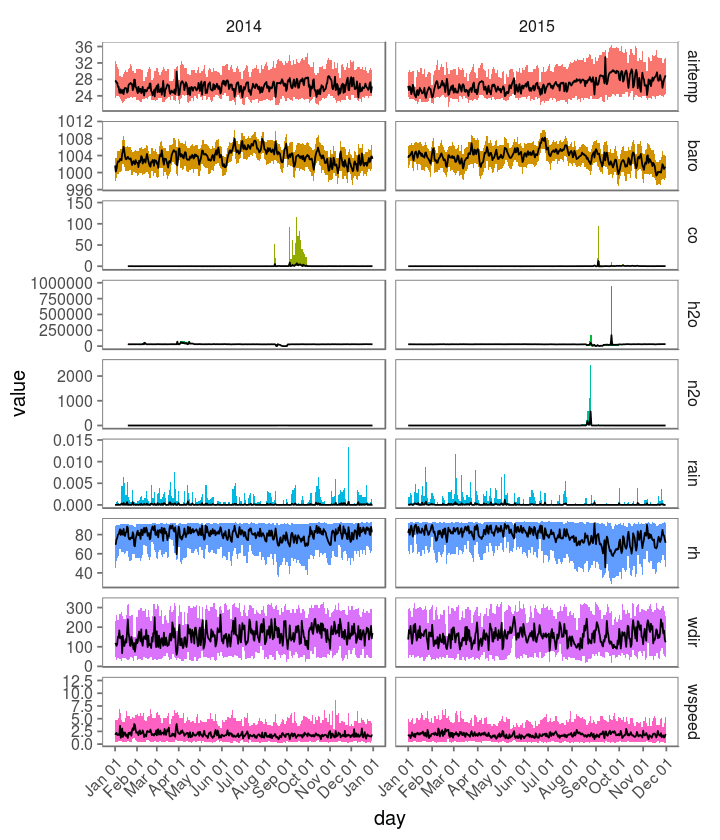

In [13]:
options(repr.plot.width=6, repr.plot.height=7)
g <- ggplot(long_amazon[stats=='mean'], aes(day, value, group=measured_var)) +
         stat_summary(fun.ymax=max, fun.ymin=min, geom='ribbon', aes(fill=measured_var)) +
         stat_summary(fun.y=mean, geom='line', color='black') + theme_few() +
         theme_few() + guides(fill=FALSE) +
         facet_grid(measured_var~year, scales="free") + xlab('day') +
         scale_x_date(date_breaks='1 month', date_labels = "%b %d") +
         theme(axis.text.x=element_text(angle=45, hjust=1)) 
g

*__Is there any of correlation between those variables?__*

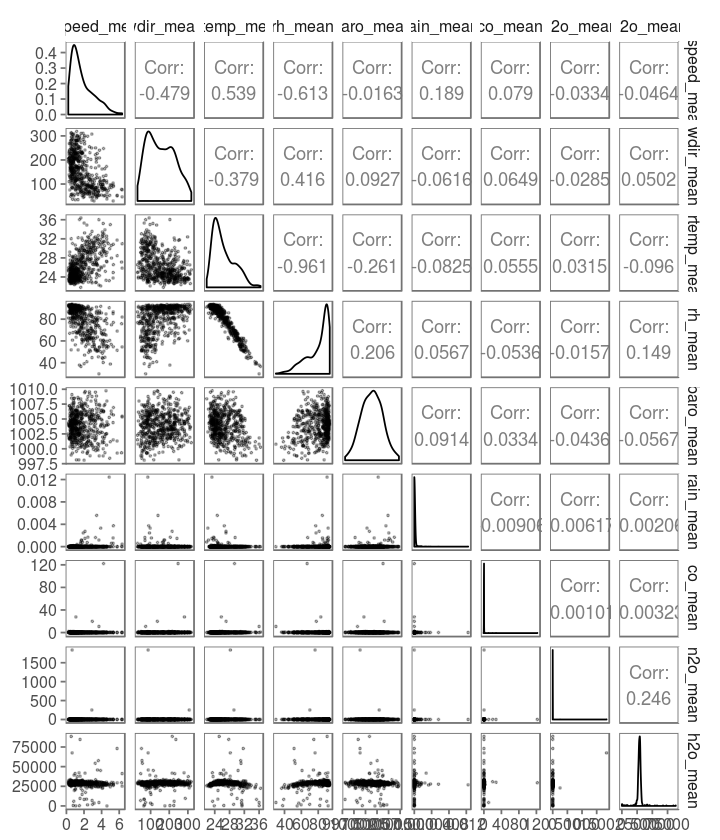

In [14]:
g <- ggpairs(na.omit(amazon[sample(nrow(amazon), 600), grep('mean', colnames(amazon)), with=F]),
         lower=list(continuous=wrap('points', size=0.4, alpha=0.3))) + 
         theme_few()
g

## *__Discussion time!__*

#### *__Correlations__*

The first thing we've identified as interesting was the negative correlation between `rh_mean` with `airtemp_mean`. After a little research we found out that this is a well-known negative correlation between air temperature and relative humidity. We can show this pattern reflected throughout the day.

Warning message:
“Removed 417 rows containing non-finite values (stat_summary).”Warning message:
“Removed 417 rows containing non-finite values (stat_summary).”

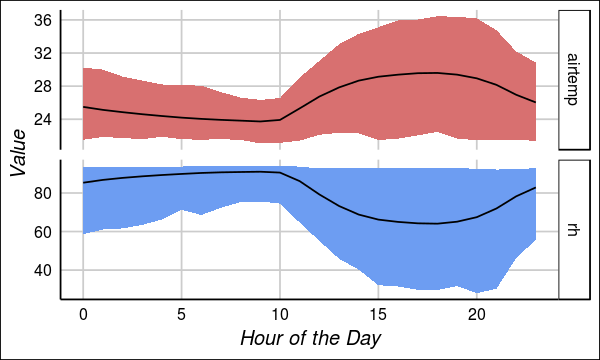

In [15]:
options(repr.plot.width=5, repr.plot.height=3)
g <- ggplot(long_amazon[stats=="mean" & (measured_var=="airtemp" | measured_var=="rh")], aes(hour, value, group=measured_var)) +
         stat_summary(fun.ymin=min, fun.ymax=max, geom='ribbon', aes(fill=measured_var)) +
         stat_summary(fun.y=mean, geom='line') + 
         ylab('Value') + xlab('Hour of the Day') + 
         facet_grid(measured_var~., scales='free') + scale_fill_manual(name='', values=c('#d87070', '#6d9df2')) +  
         theme_gdocs() + theme(legend.position='none')
g

#### *__Outliers__*

When looking at those distributions, another thing caught our attention. Carbon monoxide appears to show extremely high values. At first sight, we thought that these values were probably a consequence of failures in the sensors, which means that any conclusion drawn based on this values would probably be wrong. However, we decided to take a closer look. 

Warning message:
“Removed 678 rows containing non-finite values (stat_summary).”Warning message:
“Removed 678 rows containing non-finite values (stat_summary).”

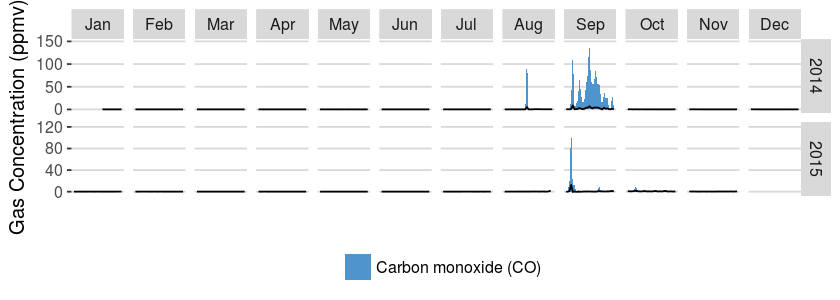

In [16]:
options(repr.plot.width=7, repr.plot.height=2.5)
g <- ggplot(long_amazon[measured_var=='co' & stats=='mean'],
         aes(month_day, value, group=1)) +
         stat_summary(fun.ymax=max, fun.ymin=min, geom='ribbon',
                      aes(fill=measured_var)) +
         stat_summary(fun.y='mean', geom='line', color='black') +
         theme_hc() +
         facet_grid(year~monthname, scales="free") +
         theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) +
         scale_fill_manual(name='', values="steelblue3",
         labels="Carbon monoxide (CO)") +
         xlab('') + 
         ylab('Gas Concentration (ppmv)')
g

Apparently, those extreme values appear to be constrained between August and October, both in 2014 and 2015. This pattern led us to think that those outlier observations were probably not being caused by sensor failures. So, what was causing it? Let's find out!

## *__Hypothesis time!__*

If you have a good memory, you remember that all this data was collected in *Manacapuru*, a small city located southwestern to *Manaus*. 

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Manacapuru,+Brazil&zoom=9&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manacapuru,%20Brazil&sensor=false


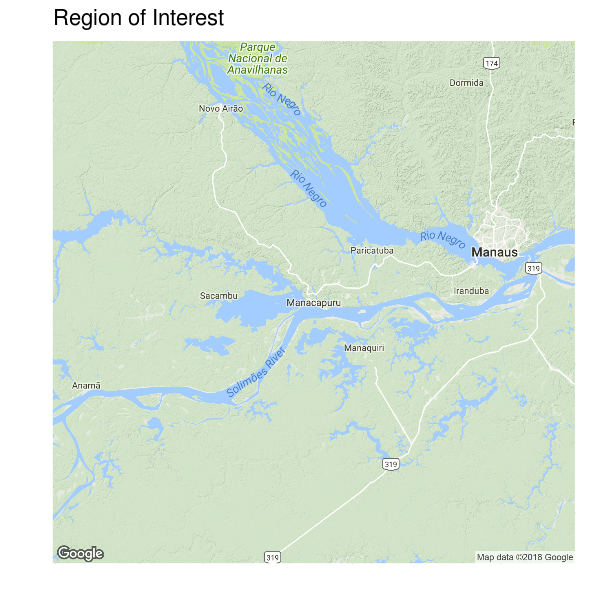

In [17]:
options(repr.plot.width=5, repr.plot.height=5)
map <- get_map(location = 'Manacapuru, Brazil', zoom = 9)
region <- ggmap(map) + ggtitle('Region of Interest') +
              ylab('') + xlab('') +
              theme_minimal() +
              theme(axis.text=element_blank(),
                    axis.ticks=element_blank())
region

Manaus is the capital of Amazonas state and it has a free-trade zone with lots of industries. With that information in mind, the first hypothesis was: **extreme values of CO in Manacapuru are probably a consequence of CO release from industries located in Manaus**. This, however, doesn't explain why the extreme values only show up between August and October. So we thought that this might be related to some seasonal changes in the wind direction and speed. Maybe, in this specific months, the wind was dragging CO from Manaus to Manacapuru. To evaluate this, we decided to take a look at the wind directions during the year.

In [18]:
windrose_plot <- function(dt, wspeed, wdir, facet=''){
    if (length(facet) == 1){
        if (facet != ''){
            dt <- na.omit(dt[, c(wspeed, wdir, facet), with=F])
        }else{
            dt <- na.omit(dt[, c(wspeed, wdir), with=F])
        }
    }
    else{
        dt <- na.omit(dt[, c(wspeed, wdir, facet), with=F])
    } 
    dt[, speed.bin := cut(get(wspeed), breaks=6, dig.lab=1)]
    setattr(dt$speed.bin,"levels", gsub('\\((.*),(.*)\\]', '\\1 - \\2', levels(dt$speed.bin)))
    dt[, dir.bin := cut(get(wdir), breaks=seq(0,360, by=22.5), dig.lab=2)]
    palette <- rev(colorRampPalette(brewer.pal(6,'Blues'))(6))
    g <- ggplot(dt, aes(dir.bin)) +
            geom_bar(data=dt, aes(x=dir.bin, fill=factor(speed.bin, levels=rev(levels(speed.bin))),
                                  y = (..count..)/sum(..count..))) +
            coord_polar(start=-(15/360)* 2*pi) + 
            scale_x_discrete(drop = FALSE, 
                             labels = c("N","NNE","NE","ENE", "E", 
                                "ESE", "SE","SSE", 
                                "S","SSW", "SW","WSW", "W", 
                                "WNW","NW","NNW")) +
            scale_fill_manual(values=palette, drop=FALSE, name='Wind Speed') +
            ylab('Frequency') + theme_minimal()  + xlab('')
    if (length(facet) == 1){
        if (facet != ''){
            g <- g + facet_wrap(~get(facet))
        }
    }else if (length(facet) == 2){
        g <- g + facet_grid(get(facet[1])~get(facet[2]))
    }else{
        stop('Maximum length of facet is 2')
    }
    return(g)
}

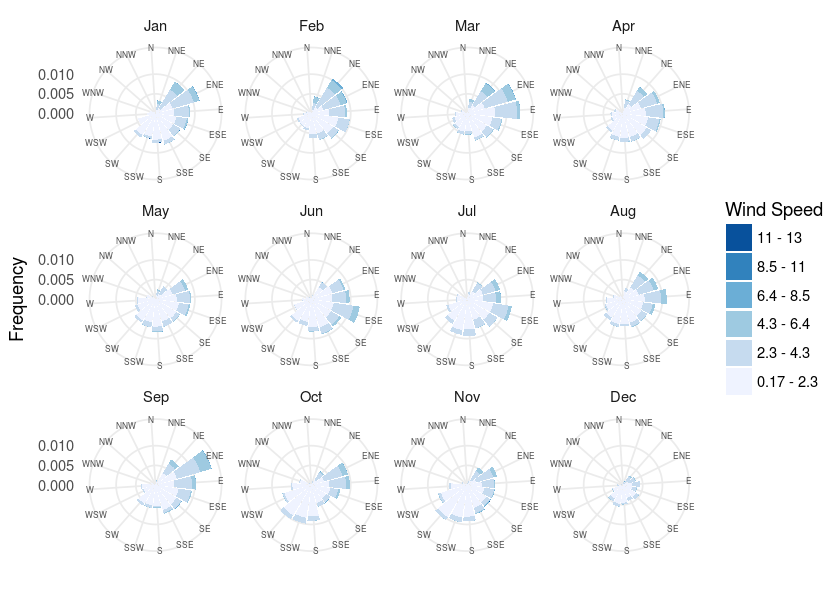

In [19]:
options(repr.plot.width=7, repr.plot.height=5)
windrose <- windrose_plot(amazon, 'wspeed_mean', 'wdir_mean', 'monthname') + 
                theme(axis.text.x=element_text(size=5))
windrose

Considering the geographical position of Manacapuru and Manaus, in order to corroborate our hypothesis, we would expect to see more wind heading to West and South in August, September and October. According to the windrose plots, there's no evidence of significant changes in the wind direction during this period.

If there is no evidence of the influence of the wind direction in our CO measures, what else could be responsible for that? Talking with an environmental engineer - who is also, by coincidence, my sister - we started to discuss what kinds of processes could increase the concentration of carbon monoxide in the air. Considering that CO is the result of incomplete combustion, we thought that would be nice to see if there is any evidence of fire in the region, which might explain those patterns.

### Fire Information for Resource Management System (FIRMS - NASA)

FIRMS is the system that allows you to download Near Real-Time (NRT) fire data collected daily by NASA satellites. If you want to download data older than 7 days you need to access the [Archive Download Tool](https://firms.modaps.eosdis.nasa.gov/download/) and request for your data. 

Now, let's take a look at it!

In [20]:
fire <- fread('data/fire_archive_M6_3376.csv')

In [21]:
head(fire)

latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp
-3.863,-54.230,300.3,1.2,1.1,2014-01-01,219,Terra,MODIS,25,6.1,287.2,4.3
-3.347,-54.907,303.6,1.1,1.1,2014-01-01,219,Terra,MODIS,56,6.1,290.4,5.7
-2.581,-54.831,302.1,1.1,1.1,2014-01-01,219,Terra,MODIS,46,6.1,291.7,4.1
1.104,-60.011,302.7,1.1,1.1,2014-01-01,220,Terra,MODIS,49,6.1,287.5,5.8
3.207,-60.165,304.7,1.1,1.0,2014-01-01,221,Terra,MODIS,61,6.1,292.7,4.3
3.605,-60.334,327.0,1.1,1.0,2014-01-01,221,Terra,MODIS,100,6.1,293.4,27.2


Let's remobe events with confidence level lower than 70

In [22]:
fire <- fire[confidence >= 70]

Preprocessing date info for future exploration

In [23]:
fire[, c('year', 'month', 'day') := tstrsplit(acq_date, '-')]
fire[, acq_date := as.Date(acq_date)]
fire[, month := factor(month.abb[as.numeric(month)], levels=month.abb)]

Let's that a look and see if there is any fire event at Manacapuru region

Warning message:
“Removed 352878 rows containing missing values (geom_point).”

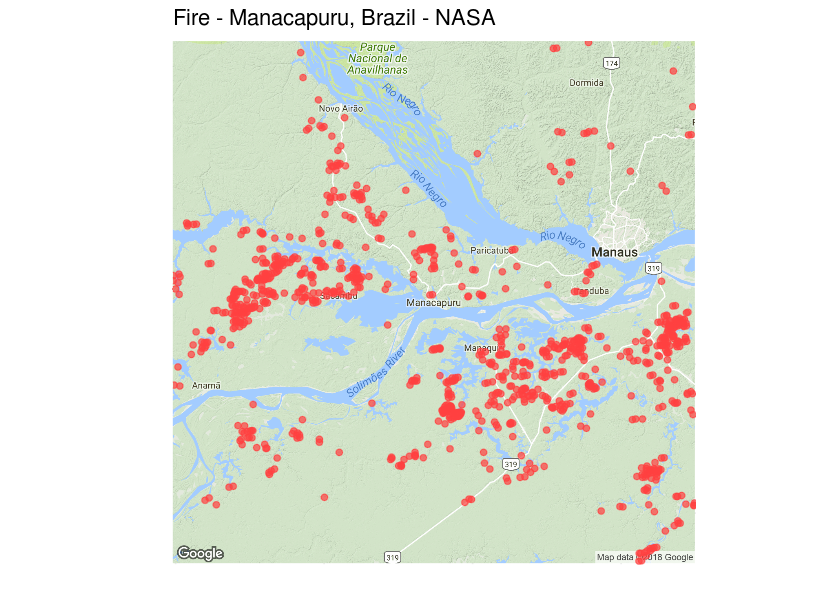

In [24]:
options(repr.plot.width=7, repr.plot.height=5)
firepoints <- ggmap(map) +
                  geom_point(data=fire,
                             aes(longitude, latitude),
                             alpha=0.7, color='brown1') +
                    ylab('') + xlab('') +
                    ggtitle('Fire - Manacapuru, Brazil - NASA') +
                    theme_minimal() + theme(axis.text=element_blank(),
                                            axis.ticks=element_blank())
firepoints

Interesting! Now, let's see how those events are spread throughout the year

Warning message:
“Removed 352878 rows containing missing values (geom_point).”

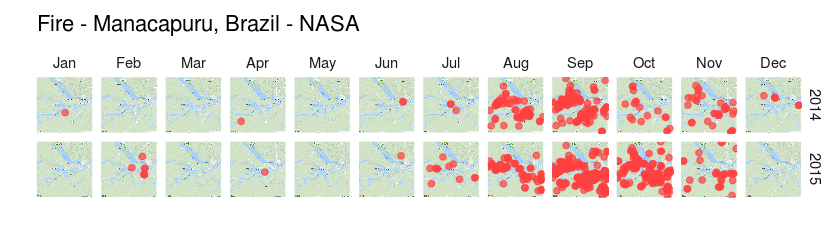

In [25]:
options(repr.plot.width=7, repr.plot.height=2)
firepoints + facet_grid(year~month)

## _**Conclusion**_

According to NASA's fire database, there is an increase in the number of fire events registered by the satellite during the months of August, September and October. This evidence corroborates our last hypothesis that carbon monoxide outlier values were caused by incomplete combustion around Manacapuru's region.